In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Implementación de un caso práctico

Para este ejercicio se proporciona un _dataset_ con datos sobre diferentes clientes de un banco que quieren comprar un piso, y si el banco les ha concedido la hipoteca o no. 

La información es la siguiente:

  - `ingresos`: los ingresos mensuales de la familia.
  - `gastos_comunes`: pagos mensuales de luz, agua, gas, etc.
  - `pago_coche`: si se está pagando cuota por uno o más coches, y los gastos mensuales en combustible, etc.
  - `gastos_otros`: compra mensual en supermercado y lo necesario para vivir.
  - `ahorros`: suma de ahorros dispuestos a utilizar para la compra de la casa.
  - `vivienda`: precio de la vivienda que quiere comprar esta familia.
  - `estado_civil`: 0-soltero, 1-casados, 2-divorciados
  - `hijos`: cantidad de hijos menores y que no trabajan.
  - `trabajo`: 0-sin empleo, 1-autónomo (freelance), 2-empleado, 3-empresario, 4-pareja: autónomos, 5-pareja: empleados, 6-pareja: autónomo y asalariado, 7-pareja: empresario y autónomo , 8-pareja: empresarios los dos o empresario y empleado
  - `hipoteca`: 0-No ha sido concedida, 1-Si que ha sido concedida (esta será nuestra columna de salida, para aprender)
  
Empezamos leyendo el _dataset_ y viendo una muestra de las primeras filas.

In [8]:
hipotecas = pd.read_csv("hipotecas.csv")
hipotecas.head(10)

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,hipoteca
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
5,5692,911,11,325,50875,360863,1,4,5,1
6,6830,1298,345,309,46761,429812,1,1,5,1
7,6470,1035,39,782,57439,606291,0,0,1,0
8,6251,1250,209,571,50503,291010,0,0,3,1
9,6987,1258,252,245,40611,324098,2,1,7,1


### 2.1. Análisis descriptivo

Cuando se nos proporciona un _dataset_, antes de empezar a hacer nada, es muy importante hacer un análisis exploratorio para conocer los datos con los que trabajaremos.

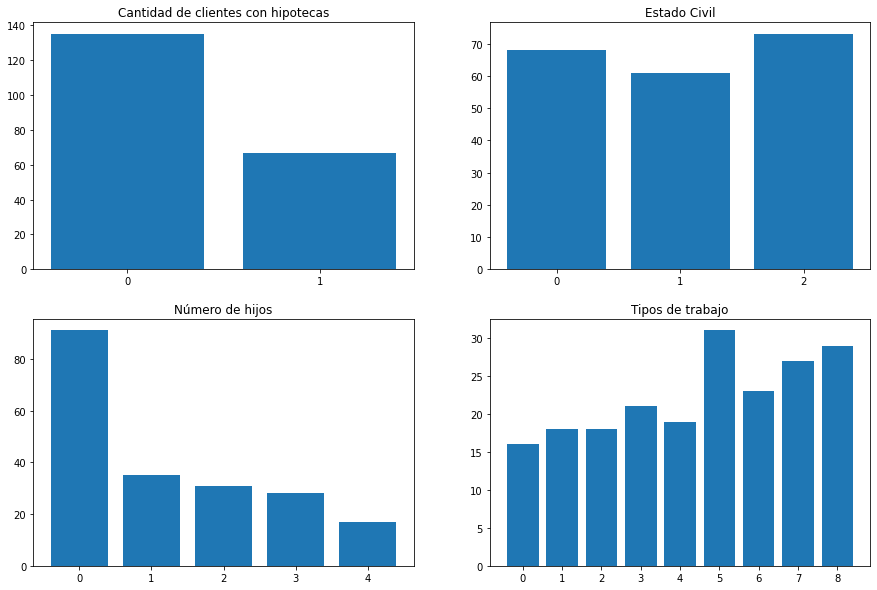

In [9]:
fx, axs = plt.subplots(2,2, figsize=(15,10))

result = hipotecas.hipoteca.value_counts()
axs[0][0].set_title("Cantidad de clientes con hipotecas")
axs[0][0].bar(result.index, result)
axs[0][0].set_xticks([0,1])

result = hipotecas.estado_civil.value_counts()
axs[0][1].set_title("Estado Civil")
axs[0][1].bar(result.index, result)
axs[0][1].set_xticks([0,1,2])

result = hipotecas.hijos.value_counts()
axs[1][0].set_title("Número de hijos")
axs[1][0].bar(result.index, result)
axs[1][0].set_xticks([0,1, 2,3,4])


result = hipotecas.trabajo.value_counts()
axs[1][1].set_title("Tipos de trabajo")
axs[1][1].bar(result.index, result)
axs[1][1].set_xticks([0,1, 2,3,4,5,6,7,8])

plt.show()

* Se visualiza que existen más clientes sin hipoteca que con hipoteca.
* En el dataset existen más divorciados que casados o solteros.
* Se observa que la mayoría de los clientes tiene un trabajo de pareja. 
* Se evidencia que pocos clientes que no tienen empleo.
* La mayoría de los clientes no tiene hijos.

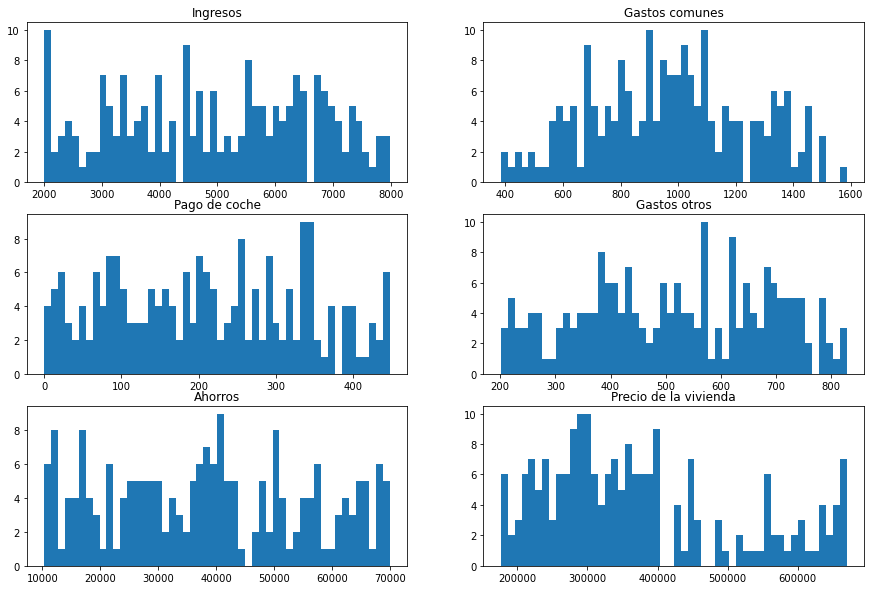

In [10]:
fx, axs = plt.subplots(3,2, figsize=(15,10))

axs[0][0].hist(hipotecas['ingresos'], bins=50)
axs[0][0].set_title('Ingresos')

axs[0][1].hist(hipotecas['gastos_comunes'], bins=50)
axs[0][1].set_title('Gastos comunes')

axs[1][0].hist(hipotecas['pago_coche'], bins=50)
axs[1][0].set_title('Pago de coche')

axs[1][1].hist(hipotecas['gastos_otros'], bins=50)
axs[1][1].set_title('Gastos otros')

axs[2][0].hist(hipotecas['ahorros'], bins=50)
axs[2][0].set_title('Ahorros')

axs[2][1].hist(hipotecas['vivienda'], bins=50)
axs[2][1].set_title('Precio de la vivienda')


plt.show()

* En los histogramas de ingresos, gatos comunes, pago de coches, otros gatos y ahorros se observan algunos clústers posiblemente debido al trabajo que realizan y por los ingresos mensuales percibidos.

* En el histograma del precio de las viviendas se observan de dos a tres clúster, posiblemente divididos por casas comunes y casas de lujo.

### 2.2. Preprocesamiento de los datos

Una vez hecho un primer análisis, se trata de "limpiar" el dataset y adaptarlo a nuestras necesidades (en este caso, predecir si se concederá la hipoteca o no).

In [11]:
hipotecas.isnull().sum()

ingresos          0
gastos_comunes    0
pago_coche        0
gastos_otros      0
ahorros           0
vivienda          0
estado_civil      0
hijos             0
trabajo           0
hipoteca          0
dtype: int64

In [12]:
hipotecas['gastos'] = hipotecas['pago_coche'] + hipotecas['gastos_comunes'] + hipotecas['gastos_otros']
hipotecas['financiar'] = hipotecas['vivienda'] + hipotecas['ahorros']

In [13]:
hipotecas = hipotecas.drop(['pago_coche', 'gastos_comunes', 'gastos_otros', 'vivienda', 'ahorros'], axis=1)

In [14]:
hipotecas.head()

,ingresos,estado_civil,hijos,trabajo,hipoteca,gastos,financiar
0,6000,0,2,2,1,1600,450000
1,6745,1,3,6,0,1496,680137
2,6455,2,1,8,1,1926,379242
3,7098,0,0,3,0,1547,715439
4,6167,0,0,3,1,1606,390444


El siguiente paso sería ver la correlación entre todas las _features_ numéricas. Esto se hace para asegurar que no hay dos variables muy relacionadas entre sí, ya que en tal caso se debería seleccionar una de las dos o combinarlas en una nueva.

In [15]:
features = ['ingresos', 'estado_civil', 'hijos', 'trabajo', 'gastos', 'financiar']

corr = hipotecas[features].corr()
corr[corr>0.8]

,ingresos,estado_civil,hijos,trabajo,gastos,financiar
ingresos,1.0,NaN,NaN,NaN,NaN,NaN
estado_civil,NaN,1.0,NaN,NaN,NaN,NaN
hijos,NaN,NaN,1.0,NaN,NaN,NaN
trabajo,NaN,NaN,NaN,1.0,NaN,NaN
gastos,NaN,NaN,NaN,NaN,1.0,NaN
financiar,NaN,NaN,NaN,NaN,NaN,1.0


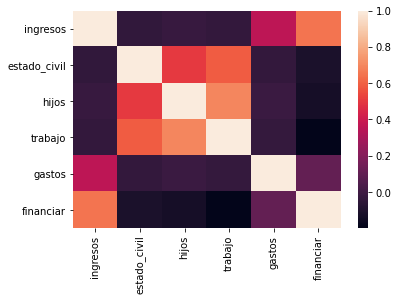

In [17]:
sns.heatmap(corr)
plt.show()

No existen variables con dos variables que tengan una correlación mayor al 80%.

Ya tenemos las variables finales con las que trabajaremos. Vamos a observar ahora cuál es la relación de cada una de ellas con el `target`.

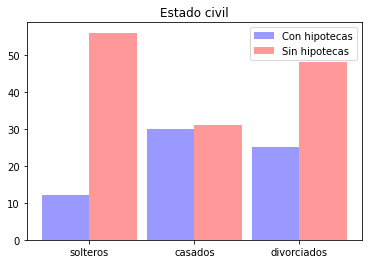

In [18]:
bar_width = 0.45
opacity = 0.4
result1 = hipotecas[hipotecas['hipoteca'] == 1].estado_civil.value_counts()
result0 = hipotecas[hipotecas['hipoteca'] == 0].estado_civil.value_counts()

rects1 = plt.bar(result1.index, result1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Con hipotecas')

rects2 = plt.bar(result0.index + bar_width, result0, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Sin hipotecas')
plt.xticks(result0.index + bar_width / 2, ('solteros', 'divorciados', 'casados'))
plt.title('Estado civil')
plt.legend()
plt.show()

Se observa que los cliente solteros y divorciados son lo que menos tienen hipotecas, por otro lado, los clientes casados son los que más tienen hipotecas.

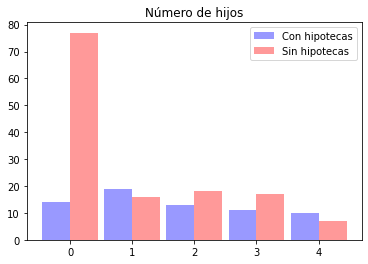

In [19]:
result1 = hipotecas[hipotecas['hipoteca'] == 1].hijos.value_counts()
result0 = hipotecas[hipotecas['hipoteca'] == 0].hijos.value_counts()

rects1 = plt.bar(result1.index, result1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Con hipotecas')

rects2 = plt.bar(result0.index + bar_width, result0, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Sin hipotecas')

plt.xticks(result0.index + bar_width / 2, ('0', '2', '3','1','4'))
plt.title('Número de hijos')
plt.legend()
plt.show()

Las personas con más hipotecas son las que tienen uno o cuatro hijo. Muy posiblemente, un cliente sin hijo no tenga una hipoteca.

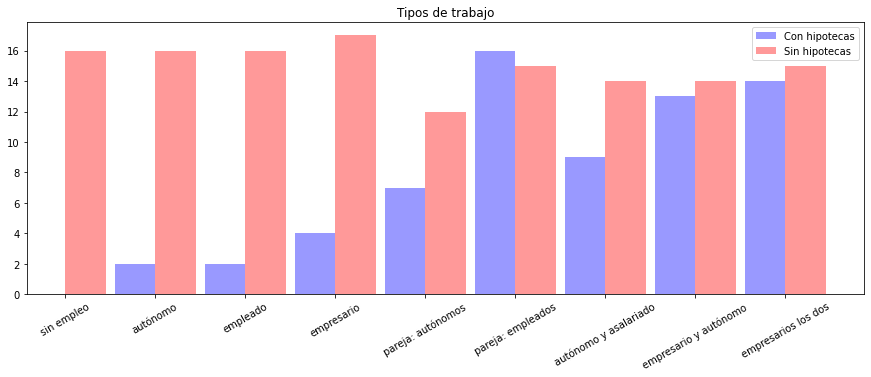

In [20]:
plt.figure(figsize=(15, 5))
result = hipotecas.trabajo.value_counts()

result1 = hipotecas[hipotecas['hipoteca'] == 1].trabajo.value_counts()
result0 = hipotecas[hipotecas['hipoteca'] == 0].trabajo.value_counts()

rects1 = plt.bar(result1.index, result1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Con hipotecas')

rects2 = plt.bar(result0.index + bar_width, result0, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Sin hipotecas')

plt.xticks(result0.index + bar_width / 2, (
    'empresario', 
    'empleado', 
    'autónomo', 
    'sin empleo', 
    'empresarios los dos', 
    'pareja: empleados', 
    'empresario y autónomo', 
    'autónomo y asalariado', 
'pareja: autónomos'), rotation = 30)
plt.title('Tipos de trabajo')
plt.xticks()
plt.legend()
plt.show()

Los cliente que son empleados en pareja son los que más hipotecas tienen, seguidos por los empresarios los dos o empresario y empleado. Los que menos tienen hipotecas son los autónomos, empleados y empresarios.

Finalmente, sólo nos queda pasar las variables categóricas a numéricas. Observad que a pesar de que todas las variables tengan números, esto no quiere decir que sean numéricas. Por ejemplo, la variable `estado_civil` tiene los valores 0-1-2, que sería lo mismo que si tuviera los valores soltero-casado-divorciado. Hay otras variables donde esto no ocurre, por ejemplo el número de hijos, que a pesar de ser categórica sí que son números, ya que es ordinal. La manera de diferenciarlo es, en el caso del número de hijos, 1 hijo es menos que 2 hijos, mientras que con el estado civil no hay un orden.

Una manera de pasar las variables categóricas en numéricas es aplicando _one-hot encoding_. Por ejemplo, en el caso de la variable `estado_civil`, lo que se haría sería crear tres columnas nuevas: `soltero`, `casado` y `divorciado`. Estas columnas tendrían los valores 0-1, por ejemplo, en el caso de la columna `soltero` tendría el valor 1 cuando `estado_civil = soltero`, y cero en otro caso.

In [22]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

encoder_df = pd.DataFrame(encoder.fit_transform(hipotecas[['estado_civil']]).toarray())

encoder_df.round(0).astype(int)

encoder_df.columns = ['soltero', 'casado', 'divorciado']

hipotecas_encode = hipotecas.join(encoder_df)
hipotecas_encode.drop('estado_civil', axis=1, inplace=True)

hipotecas_encode.head()

,ingresos,hijos,trabajo,hipoteca,gastos,financiar,soltero,casado,divorciado
0,6000,2,2,1,1600,450000,1.0,0.0,0.0
1,6745,3,6,0,1496,680137,0.0,1.0,0.0
2,6455,1,8,1,1926,379242,0.0,0.0,1.0
3,7098,0,3,0,1547,715439,1.0,0.0,0.0
4,6167,0,3,1,1606,390444,1.0,0.0,0.0


In [23]:
encoder = OneHotEncoder()

encoder_df = pd.DataFrame(encoder.fit_transform(hipotecas[['trabajo']]).toarray())

encoder_df.columns = ['sin_empleo', 'autonomo','empleado', 'empresario',
                      'pareja_autonomos', 'pareja_empleados',
                      'pareja_autonomo_asalariado', 'pareja_empresario_autónomo', 
                    'dos_empresario_empleado']

hipotecas_encode = hipotecas_encode.join(encoder_df)
hipotecas_encode.drop('trabajo', axis=1, inplace=True)

hipotecas_encode.head()

,ingresos,hijos,hipoteca,gastos,financiar,soltero,casado,divorciado,sin_empleo,autonomo,empleado,empresario,pareja_autonomos,pareja_empleados,pareja_autonomo_asalariado,pareja_empresario_autónomo,dos_empresario_empleado
0,6000,2,1,1600,450000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6745,3,0,1496,680137,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,6455,1,1,1926,379242,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7098,0,0,1547,715439,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,6167,0,1,1606,390444,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


**¿Por qué es necesario hacer one-hot encoding?**

Para convertir variables categóricas en un formato que los algoritmos de machine learning pueden usar fácilmente. La idea básica de la codificación one-hot es crear nuevas variables que toman los valores 0 y 1 para representar los valores categóricos originales.

**¿Qué diferencia hay entre tener una columna estado_civil o tres columnas soltero, casado y divorciado si la información es la misma?**

Las columnas soltero, casado y divorciado representan a la columna estado_civil en el dataset por lo que estaría de más.

**¿Por qué es incorrecto a nivel conceptual dejar las variables tal y como las teníamos, si eran números y el modelo hubiera funcionado?**

El modelo hubiese funcionado, pero mal. Voy a explicarme con el algoritmo de DecisionTree. La variable estado civil tiene los valores de [0,1,2]. Si hubiésemos conservado la variable `estado_civil`, el modelo pudo haber creado una condición que separe un subárbol cuando `estado_civil <= 0.5`. Esta condición no se podría interpretar, ya que 0.5 no representa ningún estado civil en el dataset. Además, el dataset ya cuenta con 3 variables que representan estado_civil, por lo que es mejor borrarla.

### 2.3. Entrenamiento de un modelo

Ahora que ya tenemos el _dataset_ limpio y hemos hecho un análisis de las diferentes variables, podemos proceder a entrenar un modelo para predecir si se concede una hipoteca o no. 

Probaremos con 2 modelos diferentes e interpretaremos los resultados. 

Para empezar, separamos el dataset entre _train_ y _test_.

In [25]:
from sklearn.model_selection import train_test_split

feature_names = [
    'ingresos', 'hijos', 'gastos', 'financiar', 
    'soltero', 'casado', 'divorciado',
    'sin_empleo', 'autonomo','empleado', 'empresario',
                      'pareja_autonomos', 'pareja_empleados',
                      'pareja_autonomo_asalariado', 'pareja_empresario_autónomo', 
                    'dos_empresario_empleado']

target_name = ['hipoteca']

X_train, X_test, y_train, y_test = train_test_split(
    hipotecas_encode[feature_names], 
    hipotecas_encode[target_name], 
    random_state=42, 
    test_size = 0.2)

In [27]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth= 5)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

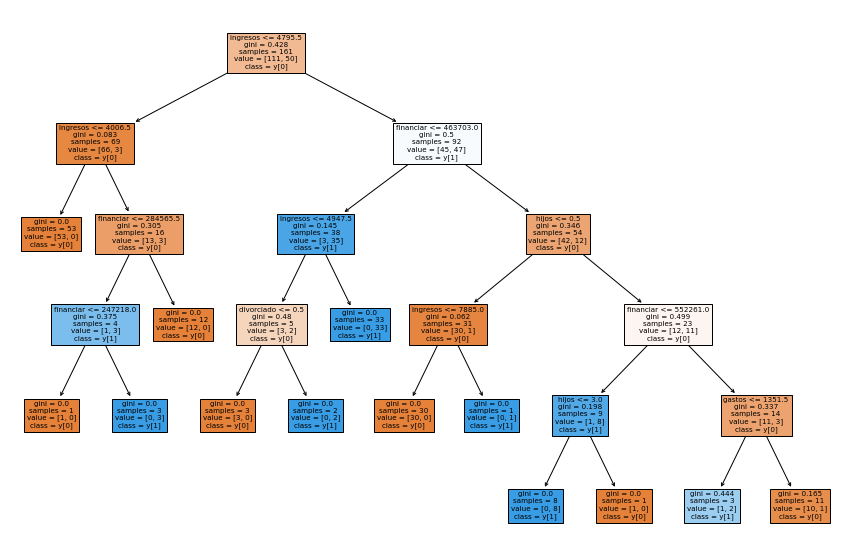

In [28]:
plt.figure(figsize=(15,10))
dot_data = plot_tree(tree_model,filled = True, 
          feature_names = feature_names,
         class_names=True)

plt.show()

In [29]:
y_pred = tree_model.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix

confusion_matrix(y_test, y_pred)

array([[24,  0],
       [ 6, 11]], dtype=int64)

La matriz de confusión se divide en 4 secciones:

* Verdaderos positivos (TP): 22 cliente con hipotecas que la predicción ha sido correcta.
* Falsos positivos (FP): la predicción dio 6 clientes con hipotecas cuando no se les deber dar una.
* Falso negativo (FN): La predicción de 2 solicitantes sin hipotecas cuando se les puede dar una.
* Verdadero negativo (TN): 11 solicitantes sin hupoteas que la predicción ha sido correcta.

In [31]:
accuracy= accuracy_score(y_test,y_pred)
accuracy

0.8536585365853658

In [32]:
list(zip(feature_names, tree_model.feature_importances_))

[('ingresos', 0.35190346209455814),
 ('hijos', 0.10686158305645364),
 ('gastos', 0.023752989506688495),
 ('financiar', 0.4810036900444934),
 ('soltero', 0.0),
 ('casado', 0.0),
 ('divorciado', 0.036478275297806353),
 ('sin_empleo', 0.0),
 ('autonomo', 0.0),
 ('empleado', 0.0),
 ('empresario', 0.0),
 ('pareja_autonomos', 0.0),
 ('pareja_empleados', 0.0),
 ('pareja_autonomo_asalariado', 0.0),
 ('pareja_empresario_autónomo', 0.0),
 ('dos_empresario_empleado', 0.0)]

**¿Cuáles son las variables que han tenido más peso?**

Las varaibles que no aportan nada al modelo son: gastos, soltero, casado, autonomo, empleado, empresario y pareja_autonomo_asalariado

Las variables que han tenido más peso en el modelo son: financiar, ingresos y sin_empleo.


**¿Has obtenido una buena precisión evaluando en test?**

La matriz de confusión se divide en 4 secciones:

* Verdaderos positivos (TP): 22 cliente con hipotecas que la predicción ha sido correcta.
* Falsos positivos (FP): la predicción dio 6 clientes con hipotecas cuando no se les deber dar una.
* Falso negativo (FN): La predicción de 2 solicitantes sin hipotecas cuando se les puede dar una.
* Verdadero negativo (TN): 11 solicitantes sin hupoteas que la predicción ha sido correcta.

El modelo tiene una precisión del 0.80.

**¿Se ha producido overfitting?**

Para que el modelo tenga overfitting debería clasificar todos los datos de entrenamiento del dataset o dividir el conjunto de datos hasta que no puede tener más subárboles.

A continuación, se calculará la precisión con los datos de entrenamiento:

In [33]:
y_pred = tree_model.predict(X_train)
accuracy= accuracy_score(y_train,y_pred)
accuracy

0.9875776397515528

La precisión del modelo con los mismos datos de entrenamiento es del 99%, casi ha clasificado correctamente todos los datos de entrenamiento, por lo que podría exister overfitting. Realizaré una prueba más. A continuación, obtendré la máxima profundidad del árbol estableciendo `min_samples_split = 2` para que el algoritmo divida las ramas con dos registros.

In [34]:
tree_model = DecisionTreeClassifier(min_samples_split=2)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
tree_model.get_depth()

7

La máxima profundida que puede tener el árbol con los datos de entrenamiento es de 7, cerca de la profundidad de 5 que se le estableció. Existe overfitting.

Los hiperparámetros que se establecerán son n_estimators y max_depth. Como el dataset de entrenamiento tiene 161 registros, en n_estimators se probaron los valores [5,10,15]. Con max_depth se probará con [3,4], debido a que con el valor de 5 en el modelo anterior producía overfitting.

In [36]:
n_estimators_range = [5,10,15]
max_depth_range = [3,4]

param_grid = dict(n_estimators=n_estimators_range, max_depth=max_depth_range)

In [42]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV

boosting_model = GradientBoostingClassifier()
grid = GridSearchCV(boosting_model, param_grid, cv=4, scoring='accuracy', verbose=1)

grid_search=grid.fit(X_train, y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\cesar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\cesar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\cesar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\cesar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

In [43]:
grid_search.best_params_

{'max_depth': 4, 'n_estimators': 10}

In [44]:
grid_search.best_score_

0.9190548780487805

In [45]:
forest_model = RandomForestClassifier()

grid = GridSearchCV(forest_model, param_grid, cv=4, scoring='accuracy', verbose=1)

grid_search=grid.fit(X_train, y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\cesar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\cesar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\cesar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\cesar\anaconda3\lib\site-packages\sklear

In [46]:
grid_search.best_params_

{'max_depth': 4, 'n_estimators': 5}

In [47]:
grid_search.best_score_

0.8821646341463414

Con  Gradient Boosting se ha obtenido un mejor resultado que con Random Forest.

Un _Random Forest_ / _Gradient Boosting_ no es tan fácil de interpretar como un simple _Decision Tree_. No podemos dibujar el árbol, porque son combinaciones de muchos árboles, pero si que podemos saber cuáles han sido las variables más decisivas a la hora de generar el modelo. Para saberlo, no podemos hacerlo a ojo mirando cómo se divide el árbol, sino que lo podemos consultar al modelo mediante la _feature importance_ de este.

In [48]:
boosting_model = GradientBoostingClassifier(max_depth=3, n_estimators=5)
boosting_model.fit(X_train, y_train)

list(zip(feature_names, boosting_model.feature_importances_))

C:\Users\cesar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[('ingresos', 0.36310025790298744),
 ('hijos', 0.12259419713261373),
 ('gastos', 0.047242261198293986),
 ('financiar', 0.46706328376610484),
 ('soltero', 0.0),
 ('casado', 0.0),
 ('divorciado', 0.0),
 ('sin_empleo', 0.0),
 ('autonomo', 0.0),
 ('empleado', 0.0),
 ('empresario', 0.0),
 ('pareja_autonomos', 0.0),
 ('pareja_empleados', 0.0),
 ('pareja_autonomo_asalariado', 0.0),
 ('pareja_empresario_autónomo', 0.0),
 ('dos_empresario_empleado', 2.700080927277363e-18)]

In [49]:
y_pred = boosting_model.predict(X_test)
accuracy= accuracy_score(y_test,y_pred)
accuracy

0.8048780487804879

In [51]:
boosting_model1 = GradientBoostingClassifier(n_estimators=2)
boosting_model1.fit(X_train, y_train)

C:\Users\cesar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingClassifier(n_estimators=2)

In [52]:
y_pred = boosting_model1.predict(X_train)
accuracy= accuracy_score(y_train,y_pred)
accuracy

0.6894409937888198

**¿Cuáles son las variables que han tenido más peso?**

Las variables con más peso utilizando Gradient Boosting son: financiar, ingresos y sin_empleo.

**¿Has obtenido una buena precisión evaluando en test?**

Se ha obtenido una precisión del 0.88 con los datos de prueba.

**¿Se ha producido overfitting?**

No. Si bien la máxima profundida que puede tener el modelo es de 3, la precisión con los mismos datos de entrenamiento es del 0.66. El modelo ha generalizado mejor los datos de entrenamiento que DecisionTree.